**Table of Contents**

* [1. Train/Test split](#split)
* [2. Initiate XGBoost Regressor](#regressor)
* [3. Fit the regressor to the training set and make predictions ](#fit)
* [4. Performance metrics](#performance)

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:

print(boston.data.shape)


(506, 13)


In [3]:
print(boston.feature_names)
# print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data['PRICE'] = boston.target

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [10]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [11]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/opt/conda/envs/rapids/lib/python3.6/site-packages/xgboost/core.py:604: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/envs/rapids/lib/python3.6/site-packages/xgboost/core.py:605: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


### 0. Parameters :
You can find a list of all the parameters here :https://xgboost.readthedocs.io/en/latest/parameter.html

What you shoud know before running XGboost, we must set three types of parameters: 

1. General parameters: 
    relates to which booster we are using to do boosting, commonly tree or linear model
    https://xgboost-clone.readthedocs.io/en/latest/parameter.html#general-parameters
2. Booster parameters
    depends on which booster you have chosen. 
     https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
3. Learning Task parameters 
    that decides on the learning scenario, for example, regression tasks may use different parameters with ranking tasks.
    https://xgboost-clone.readthedocs.io/en/latest/parameter.html#learning-task-parameters



###  1. Train / Test split 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 2. Instantiate an XGBoost regressor 

We can instantiate an XGBoost regressor object by calling the `XGBRegressor()` class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the `XGBClassifier()` class.

In [13]:
model = xgb.XGBRegressor(objective ='reg:squarederror',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10
                        )

### 3. Fit the regressor to the training set and make predictions 

In [14]:
model.fit(X_train,y_train)

preds = model.predict(X_test)


### 4. Performance metrics
Here we are using the root mean squared error (RMSE) performance metric to check the performance of the trained model on the test set. Root Mean Squared error is the square root of the mean of the squared differences between the actual and the predicted values

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.731339


this means  your RMSE for the price prediction came out to be around 10.8 per 1000$.

### 5. k-fold Cross Validation using XGboost

The **goal of cross-validation** is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

<https://en.wikipedia.org/wiki/Cross-validation_(statistics)>[# Cross-Validation, Wikipedia]

In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the `cv()` method. All you have to do is specify the `nfolds` parameter, which is the number of cross validation sets you want to build.

#### What is  k-fold cross-validation?

The procedure has a single parameter called `k` that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model. 

About the procedure, steps, and tactics how to choose a value for k you can read here : https://machinelearningmastery.com/k-fold-cross-validation/




In our example we  need to  create a hyper-parameter dictionary `params` which holds all the hyper-parameters and their values as key-value pairs but will exclude the `n_estimators` from the hyper-parameter dictionary because you will use `num_boost_rounds` instead.

You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's `cv()` method and store the results in a `cv_results` DataFrame

In [16]:
#option 1 
params = {
    'objective':"reg:squarederror",
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5, 
    'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=3,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse",
                    seed=123)


In [24]:
# help(xgb.cv)

In [18]:
cv_results.tail(5)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,2.405617,0.171343,4.029389,0.133008
46,2.366649,0.163743,4.005203,0.145275
47,2.328748,0.170367,3.990160,0.134597
48,2.295062,0.168586,3.962697,0.140461
49,2.268680,0.168031,3.953011,0.136738


In [19]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.953011
Name: test-rmse-mean, dtype: float64


RMSE for the price prediction has reduced as compared to last time and came out to be around 4.03 per 1000$.You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

#### 6. Visualize BoostingTrees and Feature importance 
XGBoost has a `plot_tree()` function that makeseasy to visualize individual trees from the fully boosted model using the entire dataset. Once you train a model using the XGBoost learning API, you can pass it to the `plot_tree()` function along with the number of trees you want to plot using the `num_trees` argument.

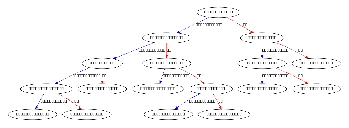

In [22]:
%matplotlib inline 
import matplotlib.pyplot as plt

xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()


We can examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a `plot_importance()` function that allows you to do exactly this.

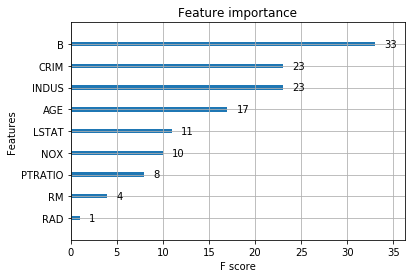

In [23]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

https://www.datacamp.com/community/tutorials/xgboost-in-python#what